In [4]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'aiml-general-championship:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F71608%2F7895811%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240314%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240314T142354Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D79ad2864880673c14cd1cec040a74b350eafb0fb1cb4263d8a340330a24352f9e350ca3c507fc11897e204f2d963109ae84e547e6ff6a737bb89cc8b585f959f8b987e8175f795cd7d8530ed10e0c910e99beb581078046c9561d1587c16ff4ba61f72d21bbd6d26968aa186e0da5a3eb41bb8b559a7370b0e9b7c58fe5178065bfa9505114316e9954392d7ed239cad41d4ad67bfaaea2abe05ebbb53066574bcabe45f6ce03486cc6f08f14342fe8a9edb828f09e0ea1c33679a2109af8519c85062ec0f73ba5cbc74bcc1eb735bd70c81cde6a818fadeed645efc1974af6744960397f71ba4c57c2a555a56aeed459e1930b027ce115433ee8985eca7bfec'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 3073275416 bytes downloaded
Downloaded and uncompressed: aiml-general-championship
Data source import complete.


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/aiml-general-championship/KCDH2024_Training_Input_10K/KCDH2024_Training_Input_10K/ISIC_0031342.jpg
/kaggle/input/aiml-general-championship/KCDH2024_Training_Input_10K/KCDH2024_Training_Input_10K/ISIC_0029779.jpg
/kaggle/input/aiml-general-championship/KCDH2024_Training_Input_10K/KCDH2024_Training_Input_10K/ISIC_0029186.jpg
/kaggle/input/aiml-general-championship/KCDH2024_Training_Input_10K/KCDH2024_Training_Input_10K/ISIC_0031141.jpg
/kaggle/input/aiml-general-championship/KCDH2024_Training_Input_10K/KCDH2024_Training_Input_10K/ISIC_0030377.jpg
/kaggle/input/aiml-general-championship/KCDH2024_Training_Input_10K/KCDH2024_Training_Input_10K/ISIC_0032349.jpg
/kaggle/input/aiml-general-championship/KCDH2024_Training_Input_10K/KCDH2024_Training_Input_10K/ISIC_0026907.jpg
/kaggle/input/aiml-general-championship/KCDH2024_Training_Input_10K/KCDH2024_Training_Input_10K/ISIC_0024521.jpg
/kaggle/input/aiml-general-championship/KCDH2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, random_split
from PIL import Image
import gc
import os
from sklearn.model_selection import train_test_split
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import torch.nn.functional as F

In [6]:
ground_truth = pd.read_csv('/kaggle/input/aiml-general-championship/KCDH2024_Training_GroundTruth.csv')
print(ground_truth.shape)
ground_truth.head()

(10015, 8)


,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0,1,0,0,0,0,0
1,ISIC_0024307,0,1,0,0,0,0,0
2,ISIC_0024308,0,1,0,0,0,0,0
3,ISIC_0024309,0,1,0,0,0,0,0
4,ISIC_0024310,1,0,0,0,0,0,0


In [7]:
#ground_truth.tail()
df=ground_truth
for i in range(9600,10015):
 df.drop(i, axis=0, inplace=True )

In [8]:
df.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0,1,0,0,0,0,0
1,ISIC_0024307,0,1,0,0,0,0,0
2,ISIC_0024308,0,1,0,0,0,0,0
3,ISIC_0024309,0,1,0,0,0,0,0
4,ISIC_0024310,1,0,0,0,0,0,0


In [9]:
LesionGrouping = pd.read_csv('/kaggle/input/aiml-general-championship/KCDH2024_Training_GroundTruth.csv')
LesionGrouping.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0,1,0,0,0,0,0
1,ISIC_0024307,0,1,0,0,0,0,0
2,ISIC_0024308,0,1,0,0,0,0,0
3,ISIC_0024309,0,1,0,0,0,0,0
4,ISIC_0024310,1,0,0,0,0,0,0


In [10]:
image_dir = '/kaggle/input/aiml-general-championship/KCDH2024_Training_Input_10K/KCDH2024_Training_Input_10K'
paths = []

# Get a sorted list of image file names
image_names_sorted = sorted(os.listdir(image_dir))

for image_name in image_names_sorted:
    try:
        # Open the image
        img = (os.path.join(image_dir, image_name))


        # Append the resized image to the list
        paths.append(img)
    except Exception as e:
        print(f"Error reading or resizing image file: {image_name}")
        print(e)

# Print the number of resized images
print("Number of images:", len(paths))


Number of images: 9600


In [11]:
print(paths[0])

/kaggle/input/aiml-general-championship/KCDH2024_Training_Input_10K/KCDH2024_Training_Input_10K/ISIC_0024306.jpg


In [12]:
label = []
for j in range(0, df.shape[0]) :
    for i in range(1,df.shape[1]) :
        if (df.iloc[j][i] == 1) :
            label.append(i-1)

print(label[0])

1


In [13]:
X_train, X_test, y_train, y_test = train_test_split(paths, label, stratify=label, test_size=0.8, shuffle=True, random_state=1357)
print(len(X_train), len(X_test))

1920 7680


In [14]:
class Config:
  learning_rate = 5*(1e-4)
  epochs = 5
  train_batch_size = 8
  test_batch_size = 16

In [15]:
class Dataset():
    def __init__(self, paths, labels, augmentations=None):
      self.paths = paths
      self.labels = labels

      if augmentations is None:
          self.augmentations = transforms.Compose([transforms.ToTensor()])
      else:
          self.augmentations = augmentations

    def __len__(self):
      return len(self.paths)

    def __getitem__(self, index):
      label = self.labels[index]

      sample = Image.open(self.paths[index]).convert(mode="RGB")
      sample = self.augmentations(sample)

      return (sample,torch.tensor(label, dtype=torch.float))

In [16]:
train_augmentations = transforms.Compose([transforms.Resize((240,240)), transforms.ToTensor()])
test_augmentations = transforms.Compose([transforms.Resize((240,240)), transforms.ToTensor()])

In [34]:
train_dataset = Dataset(X_train, y_train,train_augmentations)
test_dataset = Dataset(X_test, y_test,test_augmentations )

In [35]:
print(train_dataset[0][0])

tensor([[[0.5647, 0.5569, 0.5529,  ..., 0.6353, 0.6353, 0.6471],
         [0.5647, 0.5608, 0.5647,  ..., 0.6431, 0.6471, 0.6471],
         [0.5647, 0.5608, 0.5608,  ..., 0.6510, 0.6471, 0.6471],
         ...,
         [0.6588, 0.6588, 0.6510,  ..., 0.6902, 0.6980, 0.6902],
         [0.6510, 0.6471, 0.6392,  ..., 0.6902, 0.6863, 0.6902],
         [0.6431, 0.6392, 0.6431,  ..., 0.6902, 0.6745, 0.6745]],

        [[0.4824, 0.4824, 0.4824,  ..., 0.5647, 0.5647, 0.5647],
         [0.4863, 0.4863, 0.4824,  ..., 0.5647, 0.5686, 0.5647],
         [0.4941, 0.4941, 0.4863,  ..., 0.5725, 0.5765, 0.5725],
         ...,
         [0.5412, 0.5490, 0.5294,  ..., 0.6078, 0.6078, 0.6000],
         [0.5294, 0.5255, 0.5137,  ..., 0.6000, 0.6000, 0.6000],
         [0.5216, 0.5176, 0.5176,  ..., 0.5961, 0.5765, 0.5804]],

        [[0.5255, 0.5255, 0.5255,  ..., 0.6275, 0.6353, 0.6392],
         [0.5294, 0.5255, 0.5216,  ..., 0.6314, 0.6431, 0.6392],
         [0.5333, 0.5255, 0.5216,  ..., 0.6392, 0.6471, 0.

tensor([[[0.8157, 0.8078, 0.8196,  ..., 0.8039, 0.7961, 0.8000],
         [0.8314, 0.8196, 0.8275,  ..., 0.8157, 0.8039, 0.7961],
         [0.7922, 0.8157, 0.8118,  ..., 0.8078, 0.7882, 0.8039],
         ...,
         [0.7647, 0.7608, 0.7529,  ..., 0.7216, 0.7098, 0.7373],
         [0.7569, 0.7647, 0.7647,  ..., 0.7216, 0.7333, 0.7373],
         [0.7412, 0.7373, 0.7529,  ..., 0.7373, 0.7176, 0.7216]],

        [[0.5569, 0.5490, 0.5608,  ..., 0.5765, 0.5686, 0.5647],
         [0.5647, 0.5608, 0.5765,  ..., 0.5765, 0.5686, 0.5647],
         [0.5490, 0.5608, 0.5529,  ..., 0.5765, 0.5765, 0.5725],
         ...,
         [0.5451, 0.5333, 0.5373,  ..., 0.4941, 0.5020, 0.5216],
         [0.5294, 0.5412, 0.5255,  ..., 0.5137, 0.5059, 0.4902],
         [0.5216, 0.5412, 0.5294,  ..., 0.5098, 0.4941, 0.4824]],

        [[0.5647, 0.5569, 0.5686,  ..., 0.5725, 0.5608, 0.5608],
         [0.5608, 0.5686, 0.5804,  ..., 0.6039, 0.5765, 0.5725],
         [0.5529, 0.5843, 0.5569,  ..., 0.6000, 0.5765, 0.

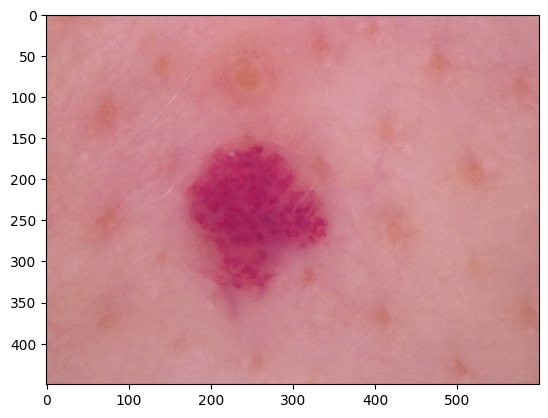

In [33]:
random_sample, random_label = test_dataset[0]
print(random_sample)
plt.imshow(random_sample.permute(1, 2, 0))
print(random_label.item())

In [20]:
train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                               batch_size = Config.train_batch_size,
                                               shuffle = True,
                                               num_workers = 2
                                              )

test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                              batch_size = Config.test_batch_size,
                                              shuffle = True,
                                              num_workers = 2
                                              )

len(train_dataloader), len(test_dataloader)

(240, 480)

In [21]:
class Model(nn.Module):

    def __init__(self, in_features=3, num_classes=10):
        super(Model, self).__init__()

        self.conv_block = nn.Sequential(
            nn.Conv2d(in_channels=in_features, out_channels=32, kernel_size=3, stride=1),
            nn.MaxPool2d(4, 4),
            nn.MaxPool2d(2, 2),
            nn.MaxPool2d(2, 2)
        )

        with torch.no_grad():
            dummy_input = torch.randn(1, in_features, 240, 240)
            dummy_output = self.conv_block(dummy_input)
            flattened_size = dummy_output.view(dummy_output.size(0), -1).size(1)

        self.linear_block = nn.Sequential(
            nn.Linear(flattened_size, 256),
            nn.Linear(256, num_classes)  # Change the number of output units to num_classes
        )

    def forward(self, x):
        x = self.conv_block(x)
        x = torch.flatten(x, 1)
        x = self.linear_block(x)
        return x

In [23]:
model = Model()
print(model)

Model(
  (conv_block): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_block): Sequential(
    (0): Linear(in_features=6272, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

In [27]:
class Trainer:
    def __init__(self, model, dataloaders, Config):
        self.model = model
        self.train_loader, self.test_loader = dataloaders
        self.Config = Config
        self.optim = torch.optim.Adam(self.model.parameters(), lr=self.Config.learning_rate, betas=(0.9, 0.999))
        self.loss_fn = nn.CrossEntropyLoss()

    def train_one_epoch(self):
        self.model.train()
        running_loss = 0
        correct_predictions = 0
        total_samples = 0

        for X, y in self.train_loader:
            X, y = X.to(device), y.to(device)
            y = y.long()
            self.optim.zero_grad()
            outputs = self.model(X)
            loss = self.loss_fn(outputs, y)
            loss.backward()
            self.optim.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == y).sum().item()
            total_samples += y.size(0)

        train_loss = running_loss / len(self.train_loader)
        train_acc = correct_predictions / total_samples
        return train_loss, train_acc

    def fit(self):
        losses = []
        accuracies = []

        for epoch in range(self.Config.epochs):
            train_loss, train_acc = self.train_one_epoch()
            losses.append(train_loss)
            accuracies.append(train_acc)
            print(f"EPOCH {epoch+1}/{self.Config.epochs}")
            print(f"Training Loss: {train_loss} | Training Accuracy: {train_acc}\n\n")

    @torch.no_grad()
    def inference(self):
        self.model.eval()
        correct_predictions = 0
        total_samples = 0

        for X, y in self.test_loader:
            X, y = X.to(device), y.to(device)
            y = y.long()
            outputs = self.model(X)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == y).sum().item()
            total_samples += y.size(0)

        accuracy = correct_predictions / total_samples
        accuracy = accuracy * 100
        return accuracy

    def predict(self, input_image):
        self.model.eval()
        input_image = input_image.to(device)
        output = self.model(input_image)
        probabilities = torch.softmax(output, dim=1)
        return probabilities.cpu().numpy()

In [28]:
trainer = Trainer(model, (train_dataloader, test_dataloader), Config)
trainer.fit()

EPOCH 1/5
Training Loss: 0.9223289949819445 | Training Accuracy: 0.6729166666666667


EPOCH 2/5
Training Loss: 0.8182193555869162 | Training Accuracy: 0.7057291666666666


EPOCH 3/5
Training Loss: 0.7776606082295378 | Training Accuracy: 0.7140625


EPOCH 4/5
Training Loss: 0.7194183692336082 | Training Accuracy: 0.7369791666666666


EPOCH 5/5
Training Loss: 0.6808431476975481 | Training Accuracy: 0.7546875




In [30]:
trainer.inference()

71.26302083333333

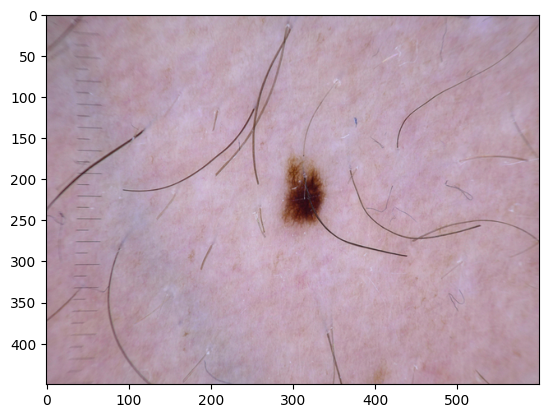

Actual:1.0


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [26]:
for i in range(10):
  random_sample, random_label = train_dataloa[i]
  random = random_sample.unsqueeze(0)
  plt.imshow(random_sample.permute(1, 2, 0))
  plt.imshow(random.permute(0, 2, 3, 1)[0])
  plt.show()
  print(f"Actual:{random_label}")

  prediction = trainer.predict(random)
  print(prediction)

In [ ]:
actual = []
pred = []
correct = 0
n_samples = 0
for i in range(0,test_dataset.shape[0]):
    random_sample, random_label = test_dataset[i]
    random = random_sample.unsqueeze(0)
    random1=random.numpy()
    prediction = predict(random)
    actual.append(random_label)
    pred.append(prediction)
    if(actual[i] == pred[i]) :
        correct+=1
    n_samples+=1

accuracy = 100 * (correct/n_samples)
print(accuracy)

In [ ]:
for i in range(len(dataset)):
    random_sample, random_label = dataset[i]
    random = random_sample.unsqueeze(0)
    if(random_label!=0):
        plt.imshow(random_sample.permute(1, 2, 0))
        plt.imshow(random.permute(0, 2, 3, 1)[0])
        plt.show()
        print(f"Actual:{random_label}")

In [29]:
def predict(input_image):
      trainer.model.eval()
      input_image = input_image.to(device)

      # Disable gradient tracking
      with torch.no_grad():
          output = trainer.model(input_image)
          probabilities = torch.softmax(output, dim=1)
          print(probabilities.cpu().numpy())
      #return probabilities.cpu().numpy()

In [90]:
predict(test_dataset[0][0])

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x484 and 15488x256)